In [1]:
import numpy as np
import pandas as pd

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, f1_score

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
data = pd.read_csv('../outputOnemonth.csv', header=0, index_col='Datetime', parse_dates=['Datetime'])
len(data)

6000

In [3]:
print(" ".join(f"'{key}'" for key in data.keys()))

'Real values' 'Small 1DCNN Classification New model predictions' 'Deep 1DCNN Classification model 11th layers' 'Deep 1DCNN Classification model 11th layers + 1024 neurones per layers' 'Deep 1DCNN Classification model 11th layers + 1024 neurones per layers + 2500 epoch' 'Basic Regression CNN model'


In [4]:
# real values
y_validation_cat = data["Real values"]

# Regression CNN
basic_regression = data["Basic Regression CNN model"]

# Classification models
y_pred_Newmodel_cat = data["Small 1DCNN Classification New model predictions"]

y_pred_CNN_depth_cat = data["Deep 1DCNN Classification model 11th layers"]
y_pred_CNN_depth1024_cat = data['Deep 1DCNN Classification model 11th layers + 1024 neurones per layers']
y_pred_CNN_depth1024_2500_cat = data['Deep 1DCNN Classification model 11th layers + 1024 neurones per layers + 2500 epoch']

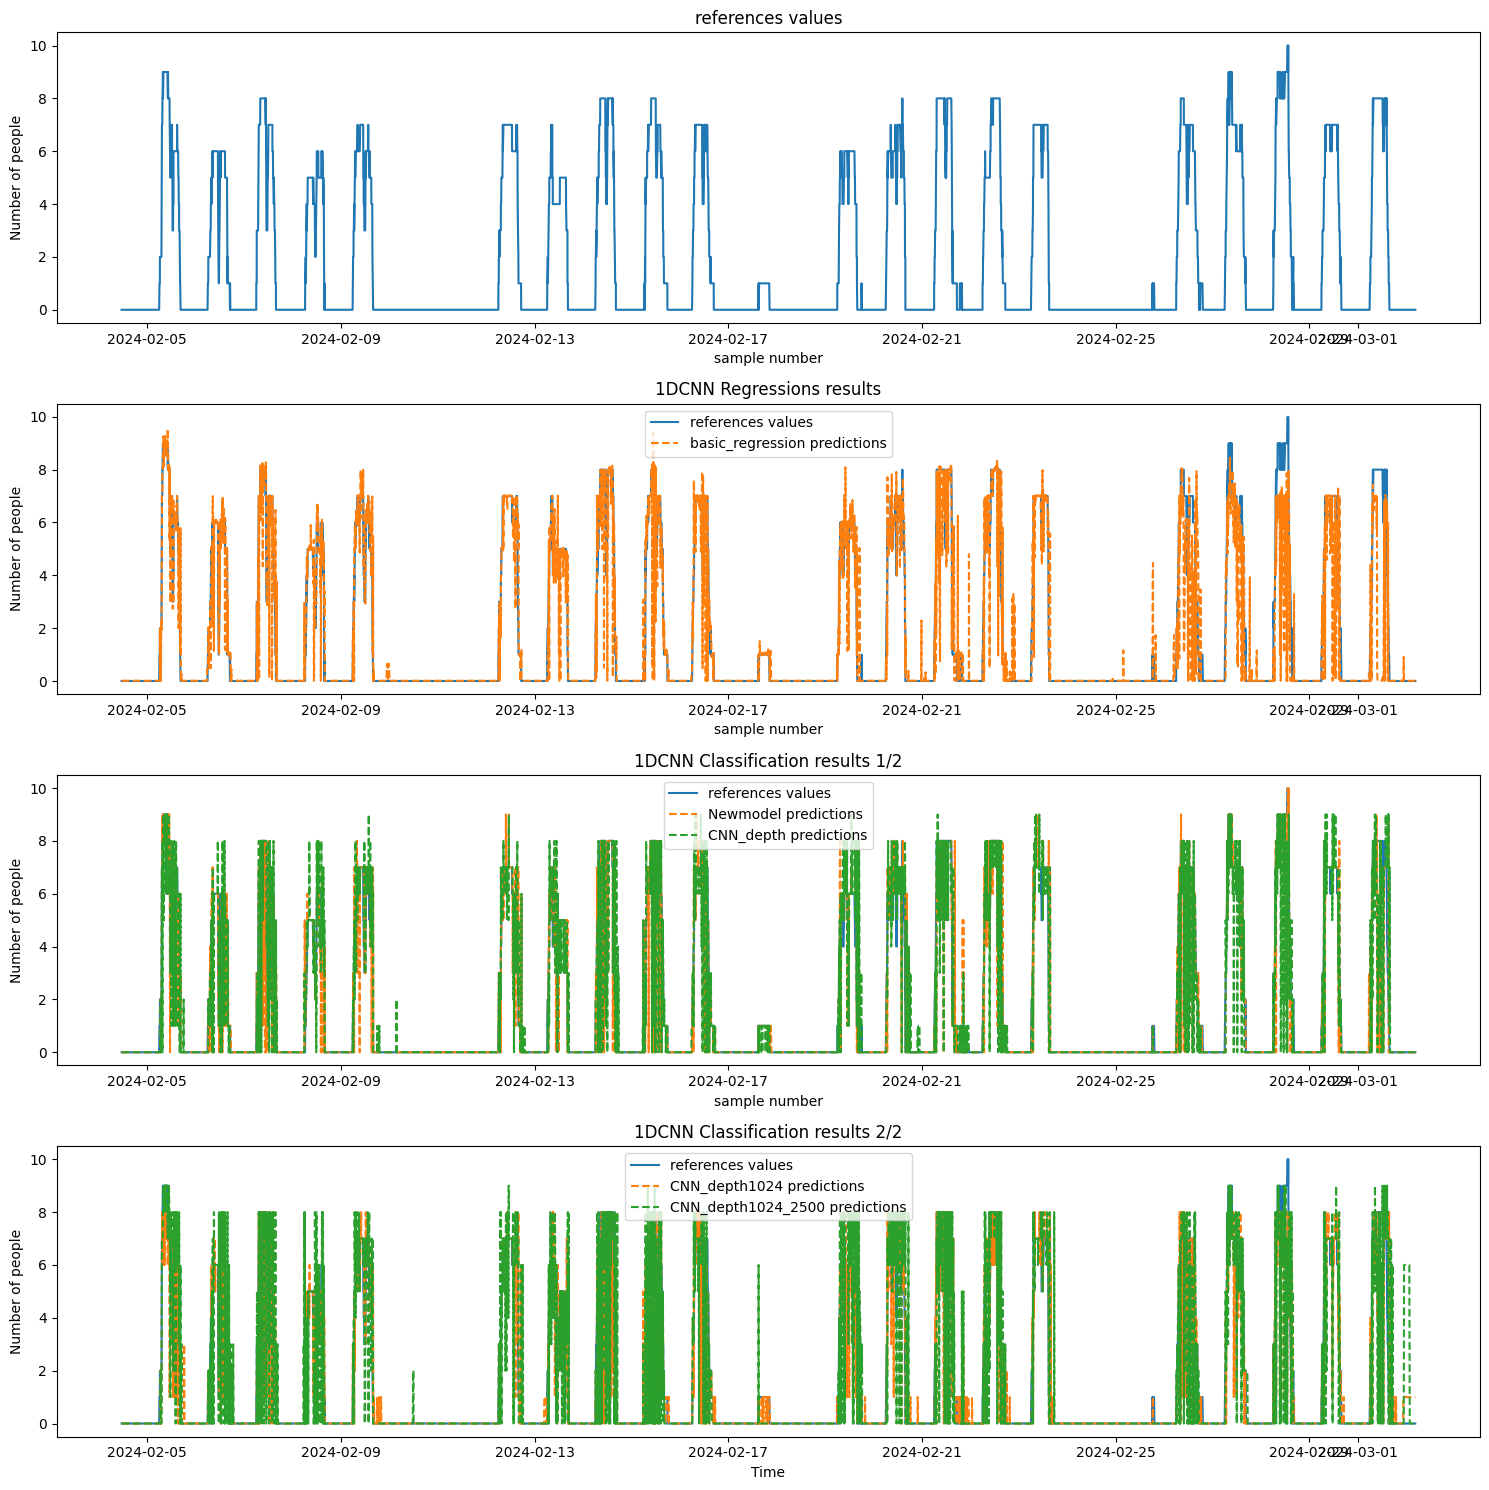

In [5]:
#plot figures:
plt.figure(figsize=(15,15))
plt.subplot(4, 1, 1)
plt.plot(y_validation_cat)
plt.title('references values')
plt.xlabel('sample number')
plt.ylabel('Number of people')

plt.subplot(4, 1, 2)
sns.lineplot(data=y_validation_cat, label='references values')
sns.lineplot(data=basic_regression, label='basic_regression predictions',linestyle='--')
plt.title('1DCNN Regressions results')
plt.xlabel('sample number')
plt.ylabel('Number of people')
plt.tight_layout()
plt.legend()

plt.subplot(4, 1, 3)
sns.lineplot(data=y_validation_cat, label='references values')
sns.lineplot(data=y_pred_Newmodel_cat, label='Newmodel predictions',linestyle='--')
sns.lineplot(data=y_pred_CNN_depth_cat, label='CNN_depth predictions',linestyle='--')
plt.title('1DCNN Classification results 1/2')
plt.xlabel('sample number')
plt.ylabel('Number of people')
plt.tight_layout()
plt.legend()

plt.subplot(4, 1, 4)
sns.lineplot(data=y_validation_cat, label='references values')
sns.lineplot(data=y_pred_CNN_depth1024_cat, label='CNN_depth1024 predictions',linestyle='--')
sns.lineplot(data=y_pred_CNN_depth1024_2500_cat, label='CNN_depth1024_2500 predictions',linestyle='--')
plt.title('1DCNN Classification results 2/2')
plt.xlabel('Time')
plt.ylabel('Number of people')
plt.legend()

plt.tight_layout()
plt.show()

# Metrics

In [6]:
accuracy = accuracy_score(y_validation_cat, y_pred_Newmodel_cat)
f1 = f1_score(y_validation_cat, y_pred_Newmodel_cat, average='macro')

print('Newmodel metrics:')
print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')

Newmodel metrics:
Accuracy: 0.8396666666666667
F1 Score: 0.5923553952984547


In [7]:
ypred = y_pred_CNN_depth_cat
accuracy = accuracy_score(y_validation_cat, ypred)
f1 = f1_score(y_validation_cat, ypred, average='macro')

print('CNN_depth metrics:')
print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')

CNN_depth metrics:
Accuracy: 0.815
F1 Score: 0.47162276453597546


In [8]:
ypred = y_pred_CNN_depth1024_cat
accuracy = accuracy_score(y_validation_cat, ypred)
f1 = f1_score(y_validation_cat, ypred, average='macro')

print('CNN_depth1024 metrics:')
print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')

CNN_depth1024 metrics:
Accuracy: 0.7818333333333334
F1 Score: 0.39404783973303864


In [9]:
ypred = y_pred_CNN_depth1024_2500_cat
accuracy = accuracy_score(y_validation_cat, ypred)
f1 = f1_score(y_validation_cat, ypred, average='macro')

print('CNN_depth1024_2500 metrics:')
print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')

CNN_depth1024_2500 metrics:
Accuracy: 0.7773333333333333
F1 Score: 0.39795456202586904


In [10]:
# Calculate additional metrics
mae = mean_absolute_error(y_validation_cat, basic_regression)
mse = mean_squared_error(y_validation_cat, basic_regression)
rmse = np.sqrt(mse)
r2 = r2_score(y_validation_cat, basic_regression)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')

Mean Absolute Error (MAE): 0.4003413903410833
Mean Squared Error (MSE): 1.4682431673430922
Root Mean Squared Error (RMSE): 1.211710843123512
R-squared (R2): 0.8188319542504998
